## lib load

In [1]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2


import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

from ACqubit import *
from ACstate import *
from wavefunction1d import *

#from tqdm import tqdm, tqdm_notebook
from tqdm.autonotebook import tqdm

pi = np.pi

D:\anaconda\lib\site-packages\tqdm\autonotebook\__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [2]:
    Nfi_ext = 51
    fi_ext_min, fi_ext_max = [-0*pi, 1*pi]
    fi_ext_list = np.linspace(fi_ext_min, fi_ext_max, Nfi_ext)[1:-1]
    dfi_ext = ( fi_ext_max - fi_ext_min ) /Nfi_ext

## Qbit def

In [3]:


J1 = 33
J2 = 1*J1+3

ACQB15 = ACQubit (E_CL = 7, 
              E_L = 0.6, 
              E_J = (J1+J2)/2, 
              E_C = 35,
              dE_J = (J2-J1)/2 )

bands = [0,1,2]

# WF 3d plot

In [117]:
Q = ACQB15
fi_list = np.linspace(-4*pi, 6*pi, 301)

fi_ext = pi
ng = 0.5
band = 0

st = Q.set_state(ng, fi_ext)



# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')

# x = fi_list
# y = np.arange(-2, 4)
# X,Y = np.meshgrid(x,y)


for q in st.Q_list[2:4]:

    x = fi_list
    dy = np.linspace(q - 0.2, q + 0.2, st.Q_dim)
    X,Y = np.meshgrid(x,dy)
    
    
    Z = np.zeros((len(y),len(x)))

    for i in range(len(y)):
    
        Z[i] = Q.V_L(fi_list, fi_ext) - Q.V_J1e(fi_list) 
    

    
    ax.plot_surface(X, Y, Z,  color='xkcd:gray', shade=False, lw=.5, alpha = 0.1)

# ax.set_zlim(0, 5)
# ax.set_xlim(-51, 51)
ax.set_zlabel("Intensity")
ax.set_xlabel("phase")
ax.set_ylabel("charge")


ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
# make the grid lines transparent
ax.xaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.zaxis._axinfo["grid"]['color'] =  (1,1,1,0)


ax.view_init(20,-120)
plt.show()

<IPython.core.display.Javascript object>


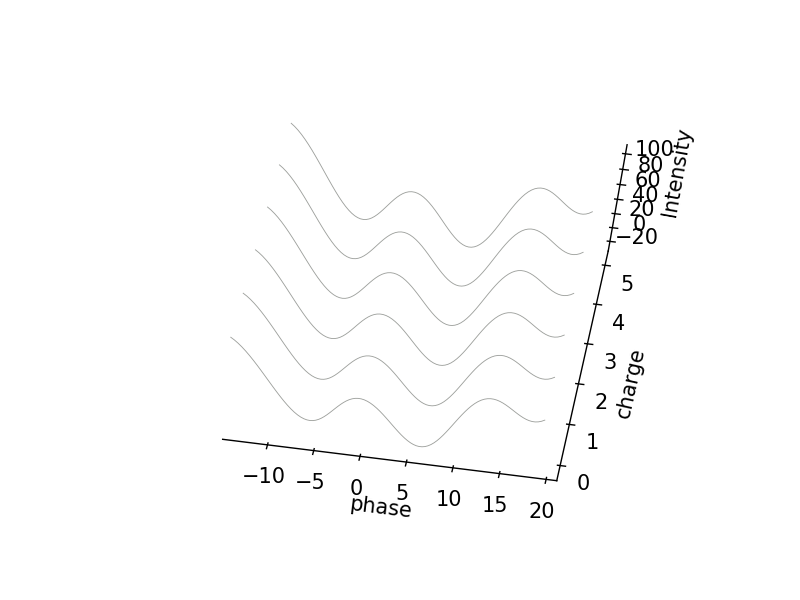

In [102]:
Q = ACQB15
fi_list = np.linspace(-4*pi, 6*pi, 101)

fi_ext = pi
ng = 0.5
band = 0

st = Q.set_state(ng, fi_ext)



fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = fi_list
y = np.arange(-2, 4)
X,Y = np.meshgrid(x,y)

# Z = np.zeros((len(y),len(x)))

for i in range(len(y)):
    
    
    Psi = 100*st.get_Psi(band, i) + 1*st.get_E( band )
    Z = Q.V_L(fi_list, fi_ext) - Q.V_J1e(fi_list)
    

    ax.plot(x, i*np.ones(101), Z, lw=.5, alpha = 0.9, color = 'xkcd:gray')
#     ax.plot(x, i*np.ones(101), 1*Psi, lw=.5, alpha = 0.9)
    


# ax.set_zlim(0, 5)
# ax.set_xlim(-51, 51)
ax.set_zlabel("Intensity")
ax.set_xlabel("phase")
ax.set_ylabel("charge")

ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
# make the grid lines transparent
ax.xaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.zaxis._axinfo["grid"]['color'] =  (1,1,1,0)

ax.view_init(20,-120)
plt.show()

<IPython.core.display.Javascript object>


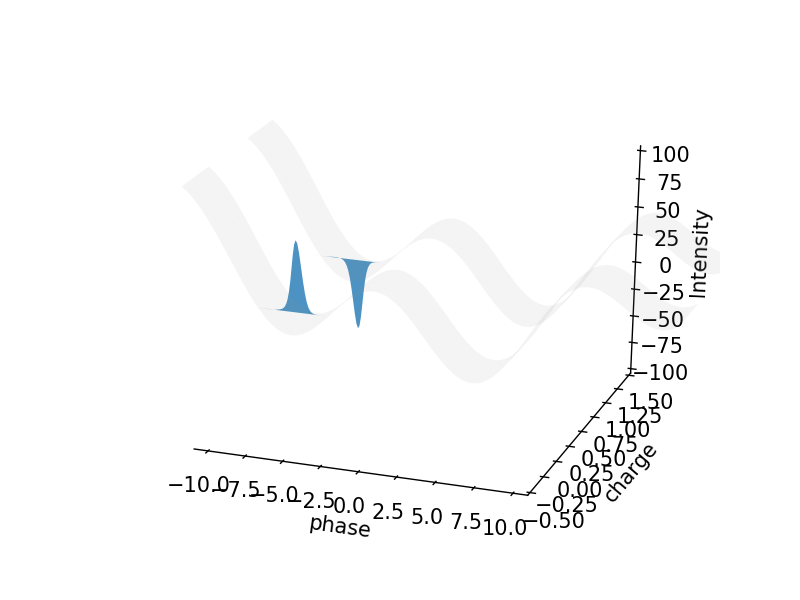

D:\anaconda\lib\site-packages\numpy\core\numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [116]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

from matplotlib.collections import PolyCollection

from matplotlib import colors as mcolors


# Fixing random state for reproducibility
np.random.seed(19680801)


def cc(arg):
    '''
    Shorthand to convert 'named' colors to rgba format at 60% opacity.
    '''
    return mcolors.to_rgba(arg, alpha=0.6)


def polygon_under_graph(xlist, ylist):
    '''
    Construct the vertex list which defines the polygon filling the space under
    the (xlist, ylist) line graph.  Assumes the xs are in ascending order.
    '''
    return [(xlist[0], 0.), *zip(xlist, ylist), (xlist[-1], 0.)]


fig = plt.figure()
ax = fig.gca(projection='3d')

# Make verts a list, verts[i] will be a list of (x,y) pairs defining polygon i
verts = []


for i in range(len(y))[2:4]:
    
    
    Psi = 300*st.get_Psi(band, i) + 0*st.get_E( band )
    Z = Q.V_L(fi_list, fi_ext) - Q.V_J1e(fi_list)
    verts.append(polygon_under_graph(x, Psi))
    


poly = PolyCollection(verts,  alpha=0.8)#, facecolors=[cc('r'), cc('g'), cc('b'), cc('y')])
ax.add_collection3d(poly, zs=y[2:4], zdir='y')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim(-10.5,10.5)
ax.set_ylim(-0.5, 1.5)
ax.set_zlim(-100, 100)

plt.show()

## Bars 


<IPython.core.display.Javascript object>


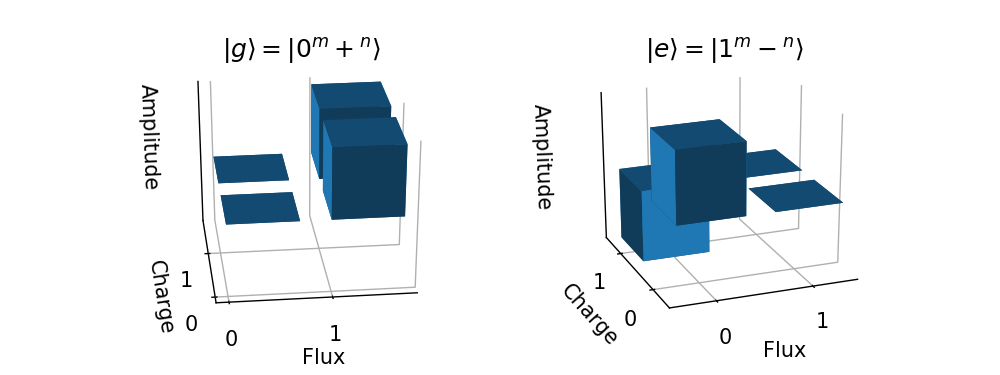

In [157]:
fig = plt.figure(figsize=(8, 3))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')

# fake data
_x = np.arange(2)
_y = np.arange(2)
_xx, _yy = np.meshgrid(_x, _y)
x, y = _xx.ravel(), _yy.ravel()

n_p = np.array([1,1])
n_m = np.array([1,-1])

m_0 = np.array([0,1])
m_1 = np.array([1,0])


top = np.kron( n_p, m_0  )
bottom = np.zeros_like(top)
width = depth = 0.7

ax1.bar3d(x, y, bottom, width, depth, top, shade=True, alpha = 0.5)
ax1.set_title(r'$|g\rangle = |0^m +^n \rangle $')

top = np.kron( n_m, m_1  )
bottom = np.zeros_like(top)
width = depth = 0.7

ax2.bar3d(x- width/2, y-depth/2, bottom, width, depth, top, shade=True)
# ax2.bar3d(x- width/2, y-depth/2, top, width, depth, bottom, shade=True)

ax2.set_title(r'$|e\rangle = |1^m -^n \rangle $')


for ax in [ax1, ax2]:
    ax.set_ylabel('Charge')
    ax.set_xlabel('Flux')
    ax.set_zlabel('Amplitude')
    # ax.set_xlim(-10.5,10.5)
    # ax.set_ylim(-0.5, 1.5)
    ax.set_zlim(-1, 1)
    ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    # make the grid lines transparent
#     ax.xaxis._axinfo["grid"]['color'] =  (1,1,1,0)
#     ax.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
#     ax.zaxis._axinfo["grid"]['color'] =  (1,1,1,0)
#     ax.set_xticklabels([0,1])
    ax.set_xticks([0,1])
    ax.set_yticks([0,1])

    ax.set_zticks([])
#     ax.set_ztickslabels([0,1])


plt.show()

# 3d bands

In [90]:
bands = [0,1]
Q = ACQB15

N_ng = 26
N_fi = 26

ng_list = np.linspace(0, 0.5, N_ng)
fi_ext_list = np.linspace(0, 1*pi, N_fi)

ng_grd, fi_ext_grd = np.meshgrid(ng_list, fi_ext_list/2/pi)

sts = [Q.set_state(ng = n, fi_ext = f) for n in ng_list for f in fi_ext_list ]

<IPython.core.display.Javascript object>


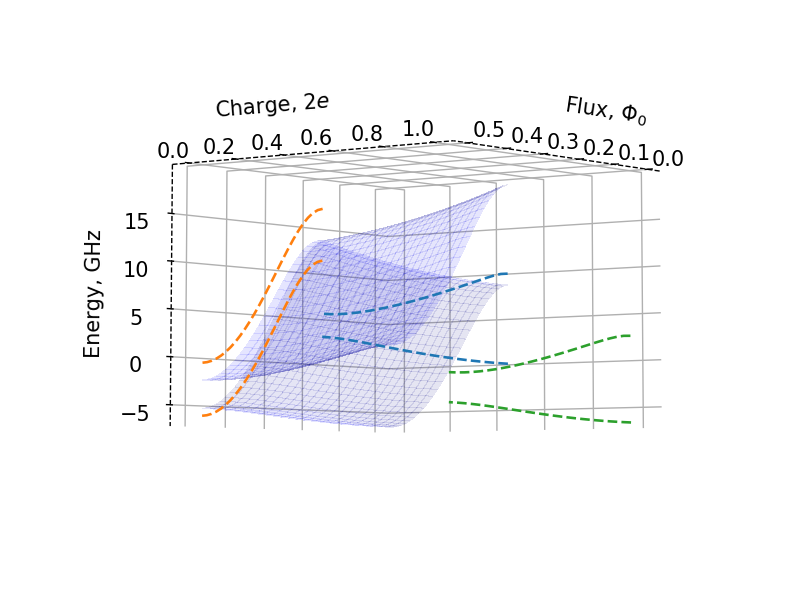

Text(0.5,0,'Energy, GHz')

In [88]:
fig = plt.figure()
ax = fig.gca(projection='3d')


for b in bands:

    E3d = np.reshape(np.array([st.get_E()  for st in sts] )[:,b], (N_ng,N_fi ))


    surf = ax.plot_surface(ng_grd, fi_ext_grd, E3d, color = 'b',
                   linewidth=0, antialiased=False, alpha = 0.1)

#     ax.contour3D(ng_grd, fi_ext_grd, E3d, zdir = 'y')
    ax.plot(ng_list, 0.5*np.ones(N_fi), E3d[int(N_fi/2)], c = 'C0' )
    ax.plot(0.5*np.ones(N_ng),fi_ext_list/2/pi , E3d[:, int(N_ng/2)], c = 'C1' )
    ax.plot(ng_list, np.ones(N_fi), E3d[0], c = 'C2' )
#     ax.plot(np.ones(N_ng),fi_ext_list/2/pi , E3d[:, 0], c = 'C2' )

ax.view_init(azim=-115, elev=15)


ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
# make the grid lines transparent
# ax.xaxis._axinfo["grid"]['color'] =  (1,1,1,0)
# ax.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
# ax.zaxis._axinfo["grid"]['color'] =  (1,1,1,0)

ax.set_ylabel(r'Charge, $2e$')
ax.set_xlabel(r'Flux, $\Phi_0$')
ax.set_zlabel('Energy, GHz')


<IPython.core.display.Javascript object>


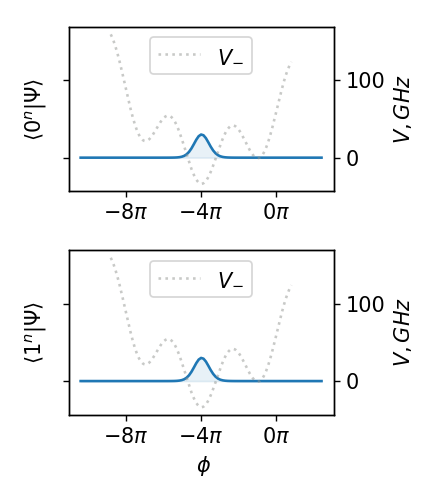

D:\anaconda\lib\site-packages\matplotlib\axes\_axes.py:5141: ComplexWarning: Casting complex values to real discards the imaginary part
  X[0] = start
D:\anaconda\lib\site-packages\matplotlib\axes\_axes.py:5142: ComplexWarning: Casting complex values to real discards the imaginary part
  X[N + 1] = end
D:\anaconda\lib\site-packages\matplotlib\axes\_axes.py:5147: ComplexWarning: Casting complex values to real discards the imaginary part
  X[N + 2:, 1] = y2slice[::-1]
D:\anaconda\lib\site-packages\numpy\core\numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [89]:
fig = plt.figure(figsize=(3.5, 4))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

fi = np.linspace(-6*pi, 6*pi, 301)
fi_ext = 2*pi*0.25

band = 0
qs = [2,3]
axs = [ax1, ax2]

st = Q.set_state(ng = 0.5, fi_ext = fi_ext)

j = 0

for q, ax in zip(qs, axs):

    Psi = 100*st.get_Psi(band, q) + 0*st.get_E( band )
    ax.fill_between(st.fi_list /2/pi, 0, Psi, alpha = 0.1, color='C{:1d}'.format(band))
    ax.plot(st.fi_list /2/pi, Psi, c='C{:1d}'.format(band), ls = '-' )
    

    ax_tw = ax.twinx()
    ax_tw.set_ylabel('$V, GHz$')
    
    Vp = Q.V_L(fi, fi_ext) + Q.V_J1e(fi) 
    Vm = Q.V_L(fi, fi_ext) - Q.V_J1e(fi) 

    vmax = np.max([np.max(Vp), np.max(Vm) ] )
    vmin = np.min([np.min(Vp), np.min(Vm) ] )


    ax.plot(fi /2/pi, Vp, 'xkcd:gray', ls = ':' , alpha=0.5 , label = '$V_{-}$')
#     ax.plot(fi /2/pi, Vm, 'xkcd:gray', ls = '-.',  alpha=0.5 , label = '$V_{+}$')
#     ax.set_ylim(vmin - 0.2*np.abs(vmin),vmax) 
    ax.legend()
    ax.set_ylabel (r'$\langle  {:1d}^n |\Psi \rangle $'.format(j) )
    j +=1

    
    lim = ax.get_ylim()
    ax_tw.set_ylim(lim)

    
    ax.set_yticklabels([])
    ax.set_xticklabels([r'${:1d} \pi$'.format(i) for i in [0,-8,-4,0,4,8]  ])
    
    
    
ax2.set_xlabel (' $\\phi$')
plt.tight_layout()


<IPython.core.display.Javascript object>


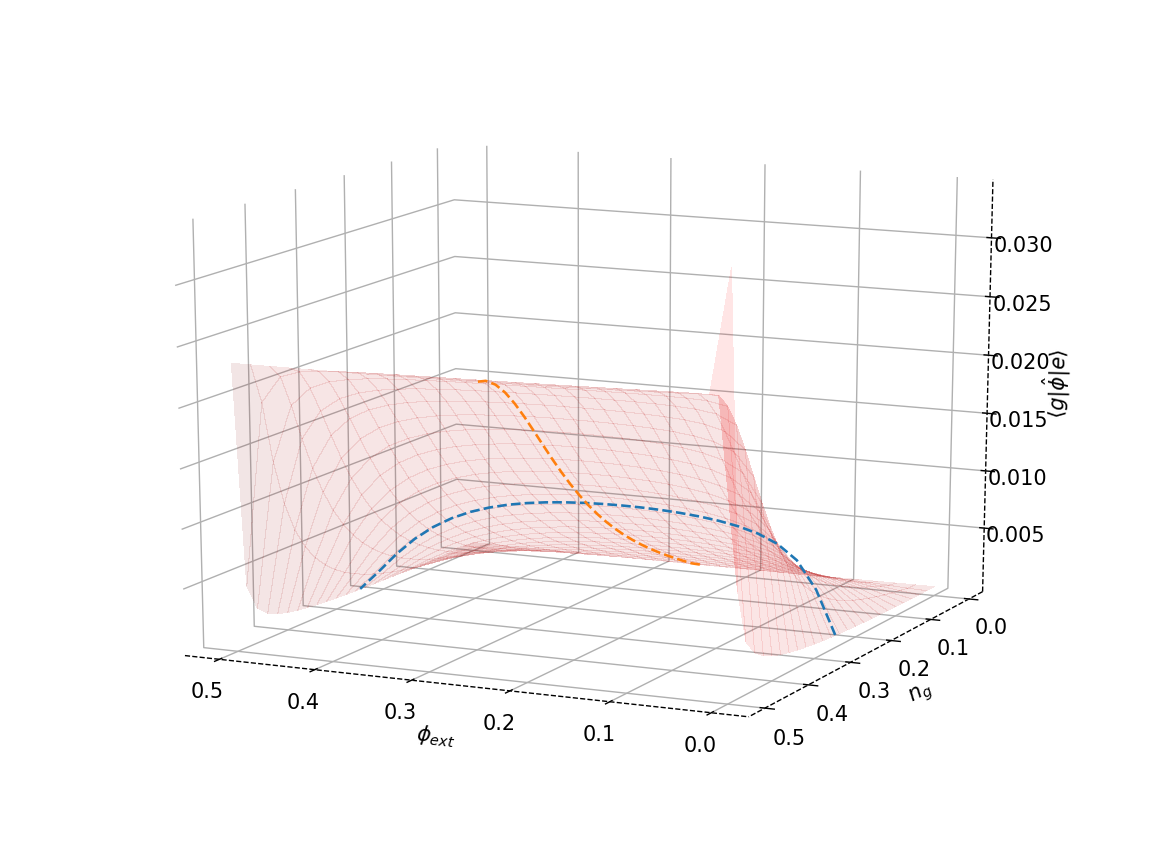

In [102]:
fig = plt.figure()
ax = fig.gca(projection='3d')


# for b in bands:

# fi3d = np.reshape(np.array([st.get_fi_ij(0,1)  for st in sts] )[:], (N_ng,N_fi ))


# surf = ax.plot_surface(ng_grd, fi_ext_grd, fi3d, color = 'b',
#                linewidth=0, antialiased=False, alpha = 0.1)


# ax.plot(ng_list, 0.25*np.ones(N_fi), fi3d[int(N_fi/2)], c = 'C0' )
# ax.plot(0.25*np.ones(N_ng),fi_ext_list/2/pi , fi3d[:, int(N_ng/2)], c = 'C1' )
# ax.plot(ng_list, np.ones(N_fi), fi3d[0], c = 'C2' )


n3d = np.reshape(np.array([st.get_n_ij(0,1)  for st in sts] )[:], (N_ng,N_fi ))


surf = ax.plot_surface(ng_grd, fi_ext_grd, n3d, color = 'r',
               linewidth=0, antialiased=False, alpha = 0.1)


ax.plot(ng_list, 0.25*np.ones(N_fi), n3d[int(N_fi/2)], c = 'C0' )
ax.plot(0.25*np.ones(N_ng),fi_ext_list/2/pi , n3d[:, int(N_ng/2)], c = 'C1' )
# ax.plot(ng_list, np.ones(N_fi), n3d[0], c = 'C2' )


ax.view_init(azim=115, elev=15)


# ax.set_zscale('log')

ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
# make the grid lines transparent
# ax.xaxis._axinfo["grid"]['color'] =  (1,1,1,0)
# ax.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
# ax.zaxis._axinfo["grid"]['color'] =  (1,1,1,0)

ax.set_ylabel(r'$n_g$')
ax.set_xlabel(r'$\phi_{ext}$')
ax.set_zlabel(r'$\langle  g|\hat{\phi} |e \rangle $')


plt.tight_layout()

<IPython.core.display.Javascript object>


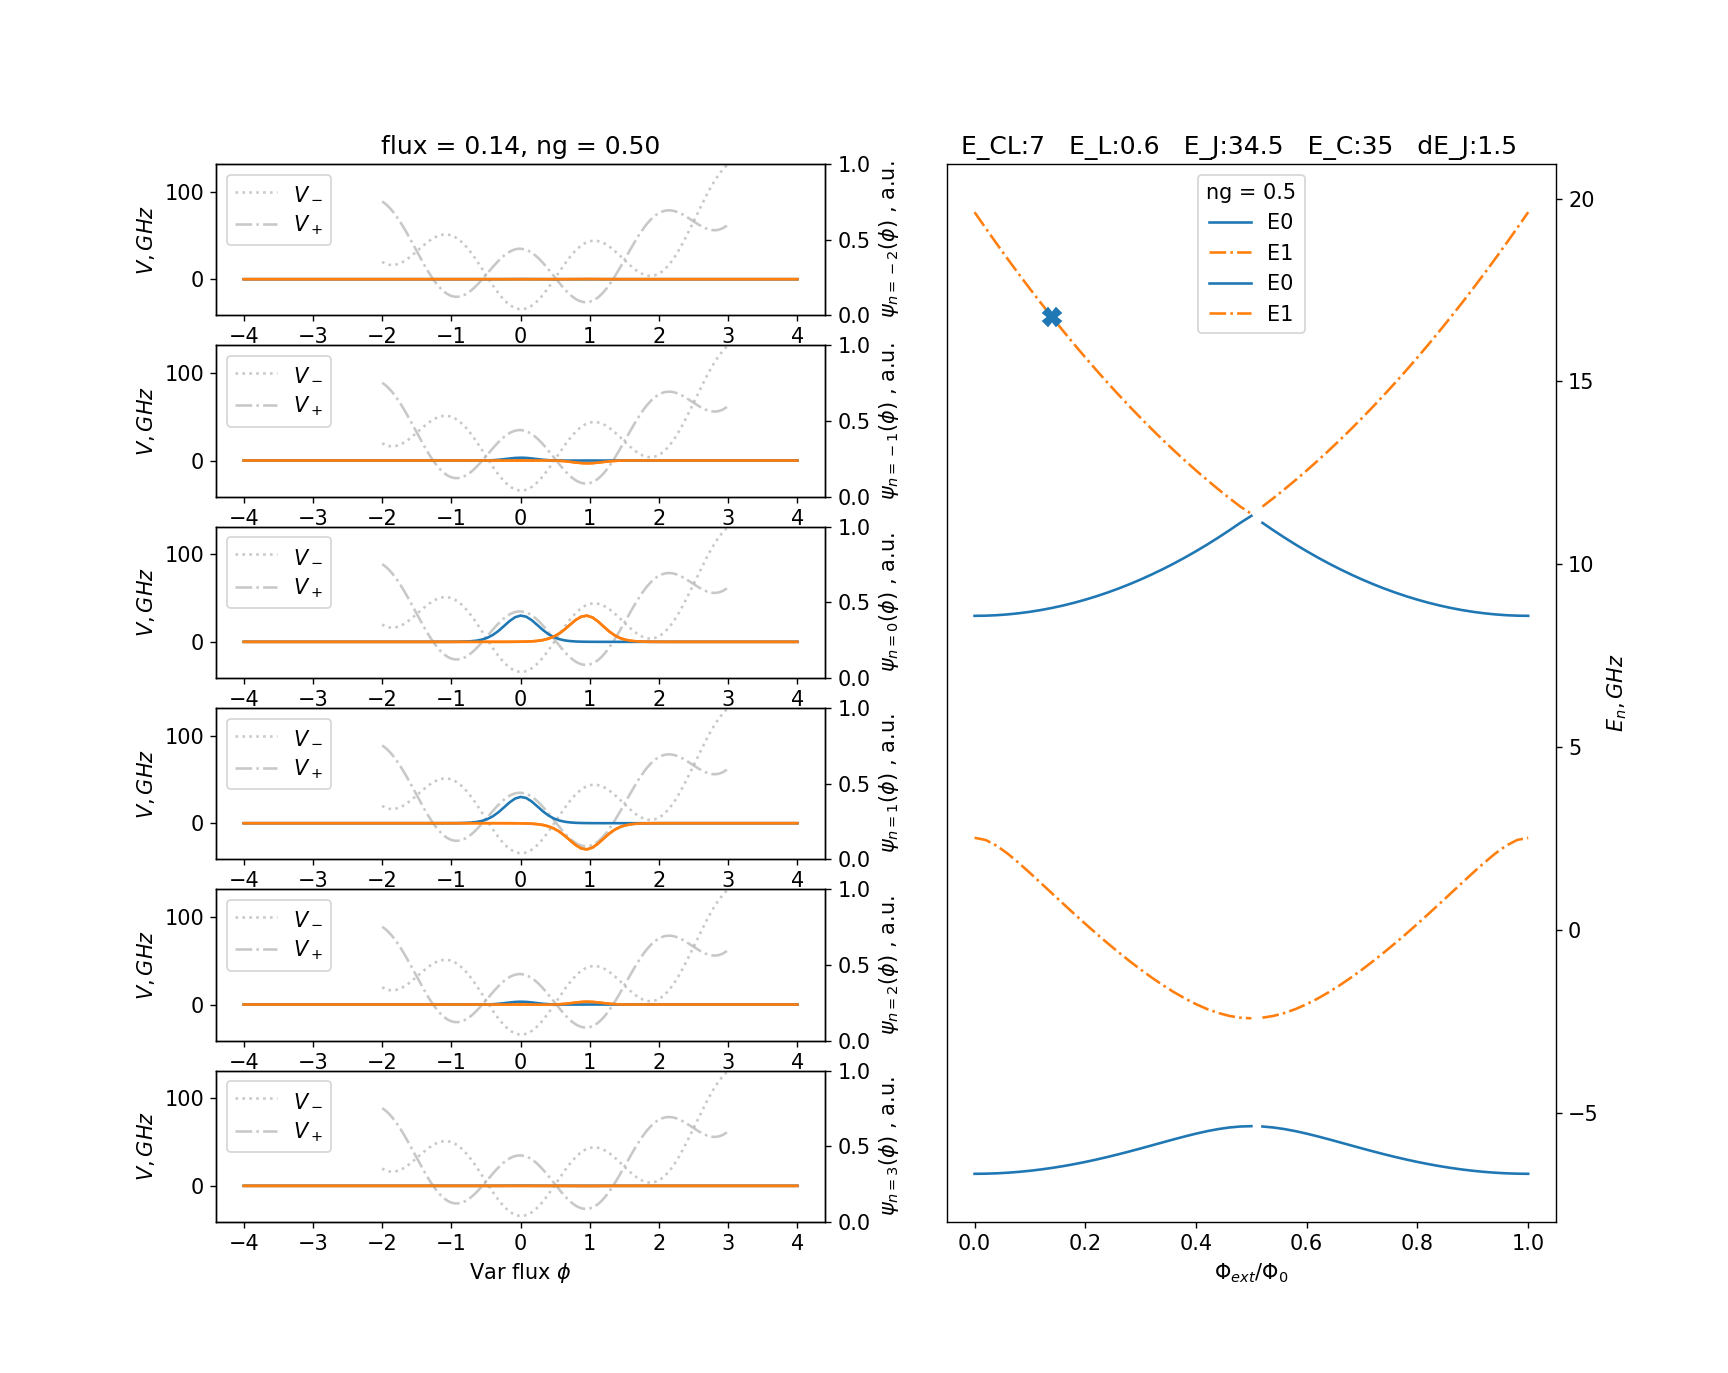

D:\anaconda\lib\site-packages\numpy\core\numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(<Figure size 1500x1000 with 13 Axes>,
  <matplotlib.axes._subplots.AxesSubplot at 0x1e1080274e0>])

In [29]:
ACQB15.plot_bands_Psi(fi_ext_list, [0,.5], [0,1])

In [ ]:


J1 = 33
J2 = 1*J1+0

ACQB15_s = ACQubit (E_CL = 7, 
              E_L = 0.6, 
              E_J = (J1+J2)/2, 
              E_C = 35,
              dE_J = (J2-J1)/2 )

bands = [0,1,2]

In [ ]:
bands = [0,1]
Q = ACQB15_s

N_ng = 51
N_fi = 51

ng_list = np.linspace(0, 1, N_ng)
fi_ext_list = np.linspace(0, 2*pi, N_fi)

ng_grd, fi_ext_grd = np.meshgrid(ng_list, fi_ext_list/2/pi)

sts_s = [Q.set_state(ng = n, fi_ext = f) for n in ng_list for f in fi_ext_list ]

In [ ]:
fig = plt.figure()
ax = fig.gca(projection='3d')


for b in bands:

    E3d = np.reshape(np.array([st.get_E()  for st in sts_s] )[:,b], (N_ng,N_fi ))


    surf = ax.plot_surface(ng_grd, fi_ext_grd, E3d, color = 'b',
                   linewidth=0, antialiased=False, alpha = 0.1)


    ax.plot(ng_list, np.ones(N_fi), E3d[int(N_fi/2)], c = 'C0' )
    ax.plot(np.ones(N_ng),fi_ext_list/2/pi , E3d[:, int(N_ng/2)], c = 'C1' )
    ax.plot(ng_list, np.ones(N_fi), E3d[0], c = 'C2' )
#     ax.plot(np.ones(N_ng),fi_ext_list/2/pi , E3d[:, 0], c = 'C2' )

    
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
# make the grid lines transparent
# ax.xaxis._axinfo["grid"]['color'] =  (1,1,1,0)
# ax.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
# ax.zaxis._axinfo["grid"]['color'] =  (1,1,1,0)
